In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [34]:
file_path = "WineQT.csv"  
df = pd.read_csv(file_path)

In [35]:
df.fillna(df.mean(), inplace=True)

In [36]:
scaler = StandardScaler()
num_cols = df.drop(columns=["quality"]).columns 
df[num_cols] = scaler.fit_transform(df[num_cols])
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [37]:
df = pd.read_csv("WineQT_preprocessed.csv")
X = df.drop(columns=["quality"])  
y = df["quality"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7292576419213974
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       102
           1       0.78      0.72      0.75       127

    accuracy                           0.73       229
   macro avg       0.73      0.73      0.73       229
weighted avg       0.73      0.73      0.73       229



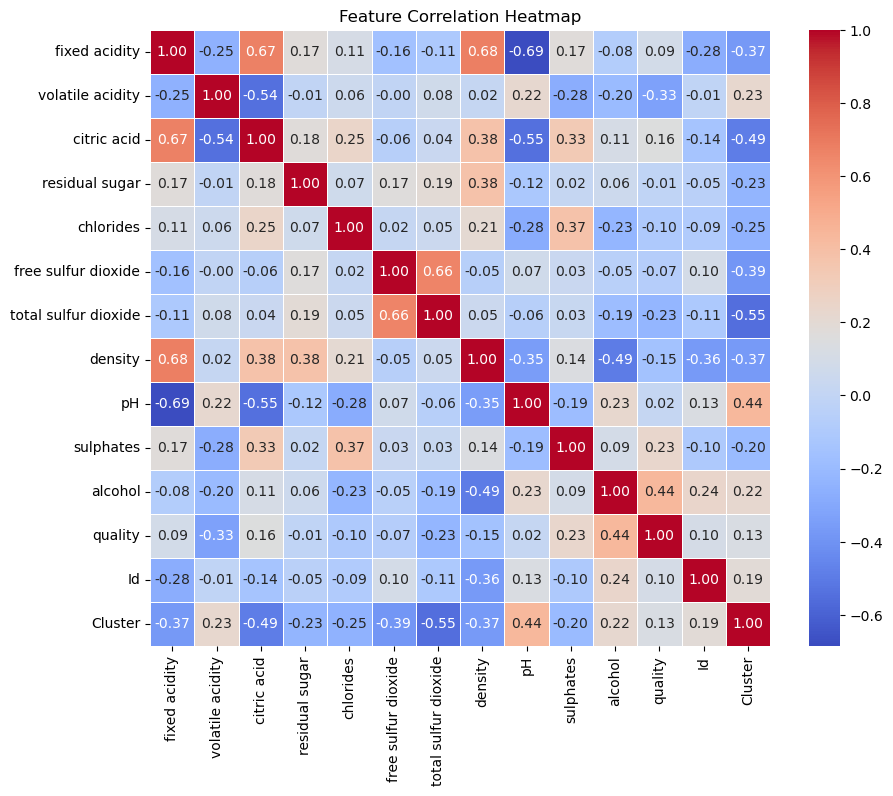

In [45]:
#Correlation matrix
corr_matrix = df.corr()
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [39]:
#Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [40]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7685589519650655
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       102
           1       0.78      0.80      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.76      0.77       229
weighted avg       0.77      0.77      0.77       229



C:\Users\srish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


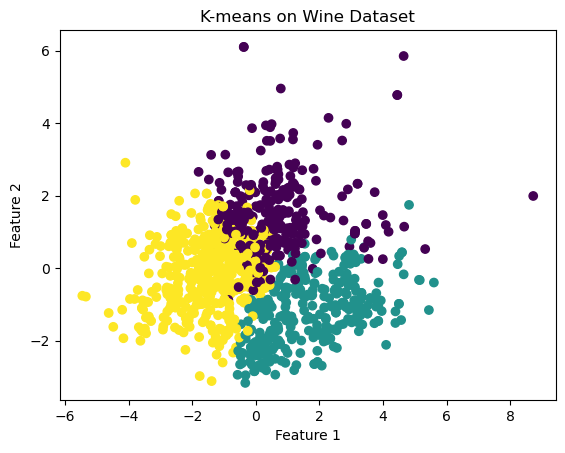

In [43]:
#K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means on Wine Dataset")
plt.show()